In [1]:
import pandas as pd
import numpy as np

In [2]:
sales=pd.read_csv("kc_house_data_small.csv.zip")

In [3]:
sales.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
sales.size

182763

In [5]:
sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
def get_numpy_data(data_sframe,features,output):
    data_sframe['constant']=1
    features=['constant']+features
    features_sframe=data_sframe[features]
    feature_matrix=features_sframe.to_numpy()
    output_sarray=data_sframe[output]
    output_array=output_sarray.to_numpy()
    return(feature_matrix,output_array)

In [7]:
def normalize_features(feature_matrix):
    norms=np.linalg.norm(feature_matrix,axis=0)
    normalized_features=feature_matrix/norms
    return(normalized_features,norms)

In [8]:
test=pd.read_csv('C:/Users/PARUL KUMARI/Desktop/Coursera_ML/kc_house_data_small_test.csv.zip')
train=pd.read_csv('C:/Users/PARUL KUMARI/Desktop/Coursera_ML/kc_house_data_small_train.csv.zip')
validation=pd.read_csv('C:/Users/PARUL KUMARI/Desktop/Coursera_ML/kc_house_data_small_validation.csv.zip')

In [9]:
feature_list=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above',
             'sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']

In [10]:
features_train,output_train=get_numpy_data(train,feature_list,'price')
features_test,output_test=get_numpy_data(test,feature_list,'price')
features_validation,output_validation=get_numpy_data(validation,feature_list,'price')

In [11]:
features_train

array([[ 1.00000e+00,  3.00000e+00,  1.00000e+00, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 1.00000e+00,  3.00000e+00,  2.25000e+00, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 1.00000e+00,  2.00000e+00,  1.00000e+00, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 1.00000e+00,  3.00000e+00,  2.50000e+00, ..., -1.21881e+02,
         2.27000e+03,  5.73100e+03],
       [ 1.00000e+00,  4.00000e+00,  2.50000e+00, ..., -1.22167e+02,
         2.52000e+03,  6.02300e+03],
       [ 1.00000e+00,  3.00000e+00,  2.50000e+00, ..., -1.22346e+02,
         1.53000e+03,  1.50900e+03]])

In [12]:
features_train,norms=normalize_features(features_train)

In [13]:
features_test=features_test/norms
features_validation=features_validation/norms

In [14]:
features_train[0]

array([ 0.01345102,  0.01163464,  0.00602491,  0.00703685,  0.00181386,
        0.0085295 ,  0.        ,  0.        ,  0.0116321 ,  0.01216718,
        0.00811747,  0.        ,  0.01333931,  0.        ,  0.01343685,
       -0.01345623,  0.00861561,  0.00229178])

In [15]:
features_test[0]

array([ 0.01345102,  0.01551285,  0.01807473,  0.01759212,  0.00160518,
        0.017059  ,  0.        ,  0.05102365,  0.0116321 ,  0.01564352,
        0.01362084,  0.02481682,  0.01350306,  0.        ,  0.01345387,
       -0.01346922,  0.01375926,  0.0016225 ])

In [16]:
features_train[9]

array([ 0.01345102,  0.01163464,  0.00602491,  0.0083488 ,  0.00050756,
        0.01279425,  0.        ,  0.        ,  0.01938684,  0.01390535,
        0.0096309 ,  0.        ,  0.01302544,  0.        ,  0.01346821,
       -0.01346251,  0.01195898,  0.00156612])

In [17]:
euclidean_distance=np.sqrt(np.sum((features_train[9]-features_test[0])**2))
euclidean_distance

0.05972359371398078

In [18]:
dist_dict={}
for i in range(0,10):
    dist_dict[i]=np.sqrt(np.sum((features_train[i]-features_test[0])**2))
    print(i,dist_dict[i])

0 0.06027470916295592
1 0.08546881147643746
2 0.06149946435279315
3 0.05340273979294363
4 0.05844484060170442
5 0.059879215098128345
6 0.05463140496775461
7 0.055431083236146074
8 0.052383627840220305
9 0.05972359371398078


In [19]:
print(min(dist_dict.items(),key=lambda x:x[1]))

(8, 0.052383627840220305)


In [20]:
for i in range(3):
    print(features_train[i]-features_test[0])

[ 0.00000000e+00 -3.87821276e-03 -1.20498190e-02 -1.05552733e-02
  2.08673616e-04 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -3.47633726e-03 -5.50336860e-03 -2.48168183e-02
 -1.63756198e-04  0.00000000e+00 -1.70254220e-05  1.29876855e-05
 -5.14364795e-03  6.69281453e-04]
[ 0.00000000e+00 -3.87821276e-03 -4.51868214e-03 -2.26610387e-03
  7.19763456e-04  0.00000000e+00  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -3.47633726e-03  1.30705004e-03 -1.45830788e-02
 -1.91048898e-04  6.65082271e-02  4.23090220e-05  6.16364736e-06
 -2.89330197e-03  1.47606982e-03]
[ 0.00000000e+00 -7.75642553e-03 -1.20498190e-02 -1.30002801e-02
  1.60518166e-03 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
  0.00000000e+00 -5.21450589e-03 -8.32384500e-03 -2.48168183e-02
 -3.13866046e-04  0.00000000e+00  4.70885840e-05  1.56292487e-05
  3.72914476e-03  1.64764925e-03]


In [21]:
print(features_train[0:3]-features_test[0])

[[ 0.00000000e+00 -3.87821276e-03 -1.20498190e-02 -1.05552733e-02
   2.08673616e-04 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -3.47633726e-03 -5.50336860e-03 -2.48168183e-02
  -1.63756198e-04  0.00000000e+00 -1.70254220e-05  1.29876855e-05
  -5.14364795e-03  6.69281453e-04]
 [ 0.00000000e+00 -3.87821276e-03 -4.51868214e-03 -2.26610387e-03
   7.19763456e-04  0.00000000e+00  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -3.47633726e-03  1.30705004e-03 -1.45830788e-02
  -1.91048898e-04  6.65082271e-02  4.23090220e-05  6.16364736e-06
  -2.89330197e-03  1.47606982e-03]
 [ 0.00000000e+00 -7.75642553e-03 -1.20498190e-02 -1.30002801e-02
   1.60518166e-03 -8.52950206e-03  0.00000000e+00 -5.10236549e-02
   0.00000000e+00 -5.21450589e-03 -8.32384500e-03 -2.48168183e-02
  -3.13866046e-04  0.00000000e+00  4.70885840e-05  1.56292487e-05
   3.72914476e-03  1.64764925e-03]]


In [22]:
diff=features_train-features_test[0]

In [23]:
print(diff[-1].sum())

-0.09343399874654643


In [24]:
np.sum(diff**2,axis=1)[15]

0.0033070590284564457

In [25]:
np.sum(diff[15]**2)

0.0033070590284564453

In [26]:
distances=np.sqrt(np.sum(diff**2,axis=1))

In [27]:
distances[100]

0.023708232416678195

In [28]:
def compute_distances(train_matrix,query_vector):
    diff=train_matrix-query_vector
    distances=np.sqrt(np.sum(diff**2,axis=1))
    return distances

In [29]:
third_house_distance=compute_distances(features_train,features_test[2])
third_house_distance.argsort()[:1]

array([382], dtype=int64)

In [30]:
min(third_house_distance)

0.0028604955575117085

In [31]:
third_house_distance[382]

0.0028604955575117085

In [32]:
np.argsort(third_house_distance,axis=0)[:4]

array([ 382, 1149, 4087, 3142], dtype=int64)

In [33]:
output_train[382]

249000

In [34]:
def compute_k_nearest_neighbors(k,features_matrix,feature_vector):
    distances=compute_distances(features_matrix,feature_vector)
    return(np.argsort(distances,axis=0)[:k])

In [35]:
compute_k_nearest_neighbors(4,features_train,features_test[2])

array([ 382, 1149, 4087, 3142], dtype=int64)

In [36]:
def compute_distances_k_avg(k,features_matrix,output_values,feature_vector):
    k_neighbors=compute_k_nearest_neighbors(k,features_matrix,feature_vector)
    avg_value=np.mean(output_values[k_neighbors])
    return avg_value

In [37]:
compute_distances_k_avg(4,features_train,output_train,features_test[2])

413987.5

In [38]:
features_test[0:10].shape

(10, 18)

In [41]:
def compute_distances_k_all(k,features_matrix,output_values,feature_vector):
    num_of_rows=feature_vector.shape[0]
    predicted_values=[]
    for i in range(num_of_rows):
        avg_val=compute_distances_k_avg(k,features_train,output_train,features_test[i])
        predicted_values.append(avg_val)
    return predicted_values

In [42]:
predicted_values=compute_distances_k_all(10,features_train,output_train,features_test[0:10])
predicted_values

[881300.0,
 431860.0,
 460595.0,
 430200.0,
 766750.0,
 667420.0,
 350032.0,
 512800.7,
 484000.0,
 457235.0]

In [45]:
min(predicted_values)

350032.0

In [46]:
predicted_values.index(min(predicted_values))

6

In [47]:
rss_all=[]
for k in range(1,16):
    predict_value=compute_distances_k_all(k,features_train,output_train,features_validation)
    residual=output_validation-predict_value
    rss=sum(residual**2)
    rss_all.append(rss)

In [48]:
rss_all

[355632427476622.0,
 317939124951086.5,
 313153111376088.5,
 301621468995236.0,
 294266734341982.4,
 287781925015337.9,
 287842561046849.3,
 286179146468967.94,
 281718696883431.6,
 280358603702662.75,
 278687700531166.9,
 278744728841428.25,
 275043861135800.9,
 273895810640073.47,
 272162684453609.75]

In [49]:
rss_all.index(min(rss_all))

14

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

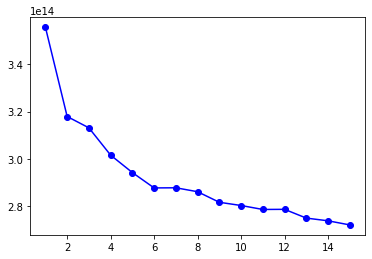

In [52]:
kval=range(1,16)
plt.plot(kval,rss_all,'bo-')

In [53]:
predict_value=compute_distances_k_all(14,features_train,output_train,features_test)
residual=output_test-predict_value
rss=sum(residual**2)
rss

133006256365677.28